<a href="https://colab.research.google.com/github/leehanchung/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
pd.set_option('display.max_columns', None)

In [2]:
col_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                  names=col_names)
print(raw.isnull().any())
print(raw.describe())
print(raw.head())
print(raw.dtypes)
assert raw.shape[0] == 690

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
A16    False
dtype: bool
               A3          A8        A11            A15
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g 

In [0]:
cont_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
cat_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [0]:
"""
FROM crx.names Documentation

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
"""
df = raw.replace('?', np.NaN)
# some numeric categories have dtype of object. change those to numeric
df[cont_cols] = df[cont_cols].apply(pd.to_numeric)
assert(df.isnull().sum().tolist() == [12, 12, 0, 6, 6, 9, 9, 0, 0, 0, 0, 0, 0, 13, 0, 0])

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [5]:
print("Mean:\n {}\n".format(df.groupby(['A16']).mean()))
print("Standard Deviation:\n {}\n\n".format(df.groupby(['A16']).std()))
#print("Descriptive Statistics:\n {}".format(df[cont_cols+['A16']].groupby(['A16']).describe()))

Mean:
             A2        A3        A8       A11         A14          A15
A16                                                                  
+    33.720492  5.904951  3.427899  4.605863  164.421927  2038.859935
-    29.808231  3.839948  1.257924  0.631854  199.699468   198.605744

Standard Deviation:
             A2        A3        A8       A11         A14          A15
A16                                                                  
+    12.809641  5.471485  4.120792  6.320242  161.770675  7659.763941
-    10.919291  4.337662  2.120481  1.900049  181.564835   671.608839




**For continous features, we notice A15 has extremely different descriptive stats between the + and - classes and A2 has similar descriptive stats. Thus, we will run a two sample t test to see if they differ.**

**H0**: For feature A15, '+' class and '-' class have the same mean

**Ha**: For feature A15, '+' class and '-' class have do not have the same mean

Alpha is set to 0.05

In [0]:
cont_plus = df[df['A16'] == '+'][cont_cols]
cont_minus = df[df['A16'] == '-'][cont_cols]

In [7]:
st.ttest_ind(cont_plus['A15'], cont_minus['A15'], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

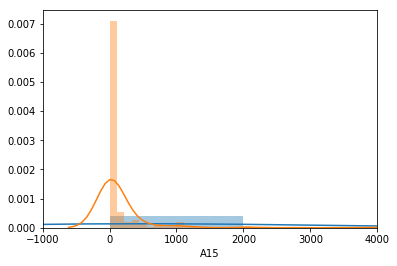

In [8]:
fig, ax = plt.subplots()
sns.distplot(cont_plus['A15'].dropna(),label='+', ax=ax)
sns.distplot(cont_minus['A15'].dropna(),label='-', ax=ax)
ax.set_xlim([-1000,4000]);

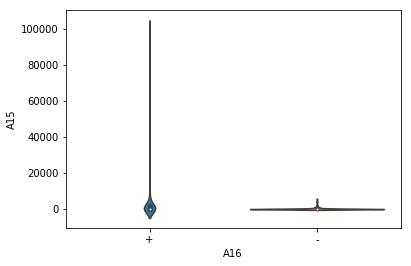

In [9]:
sns.violinplot(x="A16", y="A15", data=df);

Since p-value < 0.05 of the two sample t-test is less than 0.05, we can reject **H0** that '+' and '-' for feature 'A15' have the same mean.

Now for A2.

**H0**: For feature A2, '+' class and '-' class have enough evidence to show that they have the same mean

**Ha**: For feature A2, '+' class and '-' class do not have enough evidence to show the same mean

Alpha is set to 0.05

In [10]:
st.ttest_ind(cont_plus['A2'], cont_minus['A2'], nan_policy='omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

Since p-value of the two sample t-test is less than 0.05, we can reject the Null that for feature 'A2', '+' class and '-' class have the same mean. Plotting some random charts for sanity check.

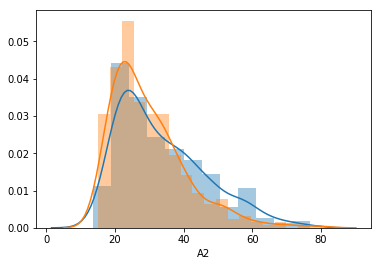

In [11]:
sns.distplot(cont_plus['A2'].dropna(),label='+');
sns.distplot(cont_minus['A2'].dropna(),label='-');

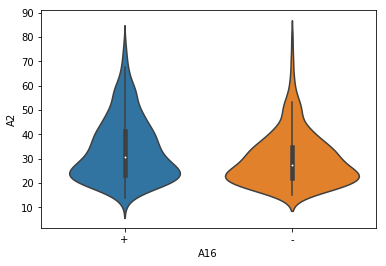

In [12]:
sns.violinplot(x="A16", y="A2", data=df);

In [13]:
for cont in cont_cols:
    _, pval = st.ttest_ind(cont_plus[cont], cont_minus[cont], nan_policy='omit')
    print("Two sample t-test for {} produces an result of {}".format(cont,pval))
    

Two sample t-test for A2 produces an result of 2.0276637071781407e-05
Two sample t-test for A3 produces an result of 4.551680702308068e-08
Two sample t-test for A8 produces an result of 3.6710537401601785e-18
Two sample t-test for A11 produces an result of 7.957718568079967e-29
Two sample t-test for A14 produces an result of 0.008586135473979569
Two sample t-test for A15 produces an result of 3.4520256956287944e-06


For the categorical features, explore by creating **"cross tabs" (aka contingency tables) between them and the class label, and apply the Chi-squared test to them.** pandas.crosstab can create contingency tables, and scipy.stats.chi2_contingency can calculate the Chi-squared statistic for them.

### There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.###

#### Cross Tabs

In [14]:
for cat in cat_cols:
    print(pd.crosstab(df['A16'], df[cat]))
    print('\n')

A1     a    b
A16          
+     98  206
-    112  262


A4   l    u    y
A16             
+    2  256   45
-    0  263  118


A5     g  gg    p
A16              
+    256   2   45
-    263   0  118


A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6


A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
+    25   2   8  87  3  2  1  169  6
-    34   4  49  51  5  2  1  230  2


A9     f    t
A16          
+     23  284
-    306   77


A10    f    t
A16          
+     98  209
-    297   86


A12    f    t
A16          
+    161  146
-    213  170


A13    g  p   s
A16            
+    287  5  15
-    338  3  42




#### Chi square tests

In [15]:
for cat in cat_cols:
    _, pval, _, _ = st.chi2_contingency(pd.crosstab(df['A1'], df[cat]), correction=False)
    if pval > 0.05:
        print("For {}, we can reject the null that classes are independent with p-value of {}.".format(cat, pval))
    else:
        print("For {}, we CANNOT reject the null that classes are independent with p-value of {}.".format(cat, pval))

For A1, we CANNOT reject the null that classes are independent with p-value of 1.8191044737481392e-149.
For A4, we can reject the null that classes are independent with p-value of 0.16927014245378488.
For A5, we can reject the null that classes are independent with p-value of 0.16927014245378488.
For A6, we CANNOT reject the null that classes are independent with p-value of 7.057474341497169e-13.
For A7, we CANNOT reject the null that classes are independent with p-value of 0.00014212870614743197.
For A9, we can reject the null that classes are independent with p-value of 0.6406280767021049.
For A10, we can reject the null that classes are independent with p-value of 0.052548206557927704.
For A12, we can reject the null that classes are independent with p-value of 0.1651171396624529.
For A13, we can reject the null that classes are independent with p-value of 0.09199124541769176.


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

**For the two t-tests,** we chose A2 and A15 to test if class '+' and class '-' have the same mean.  We fail to reject both, thus they do not have the same means. 

We found that interesting so we made a few plots for sanity check. For A15, it is quite clear that the distribution for both classes are very different due to the extreme outliers. However, for A2, the distributions of both classes looks to have similar shapes yet the two sample t-test fail to reject the null that both classes have same means. Upon further investigation throughout every single continuous variable, we found that we were able to reject the null hypothesis that both classes have the same mean for all numeric categories. Perhaps there might not be enough evidences to show.

**For the categorical variables,** we simply run chi-square tests through all of them. For category A1, A6, and A7, we *cannot* reject the null hypothesis that the two classes are independent.  For category A4, A5, A9, A10, A12, A13, we *can* reject the null hypothesis that the classes are independent.

**The most challenging part** of this sprint challenge is trying to make sense of the two sample t-tests failing to reject the null when the mean and standard deviation are similar.


*Your words there!*